[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

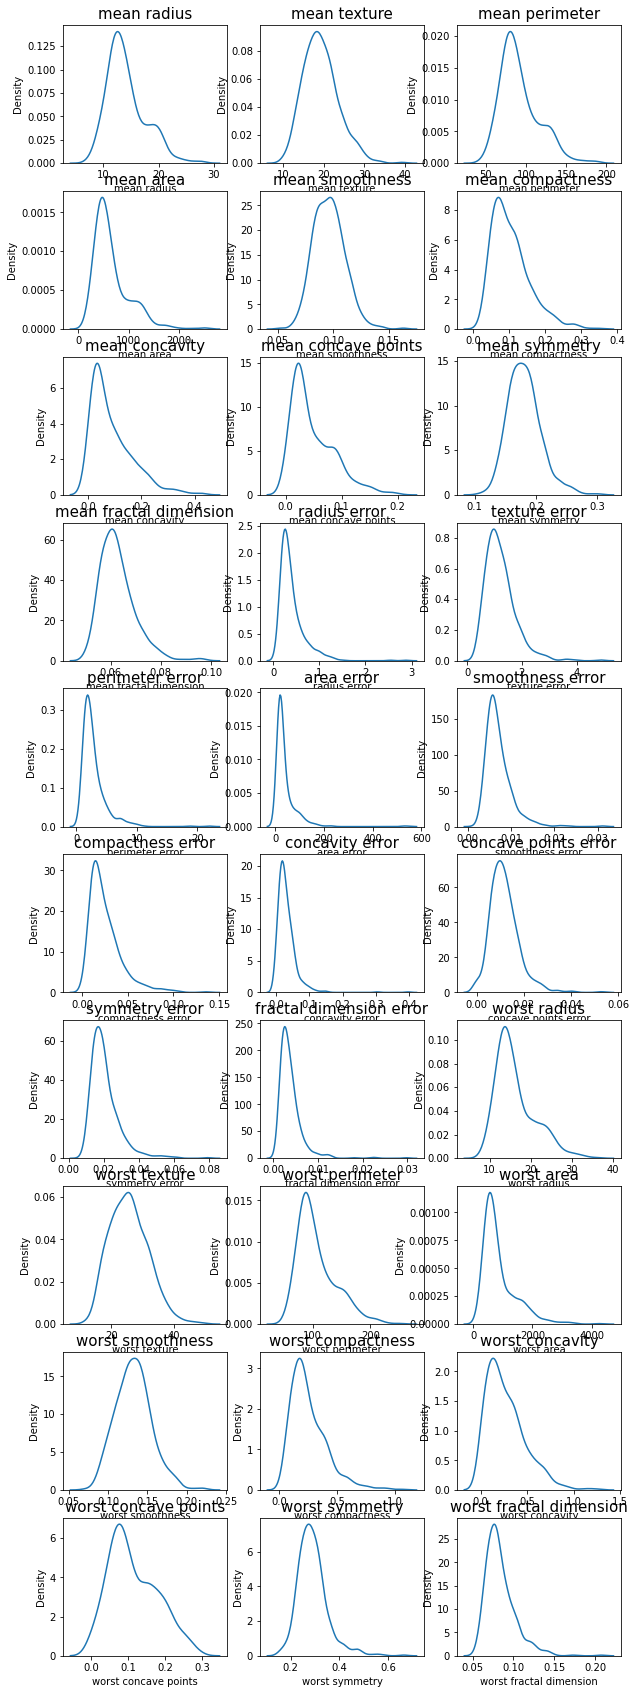

In [49]:
from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_data = cancer.data

import pandas 
cancer_label = cancer.target
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)


print(cancer_label)
print(cancer.feature_names)
print(X_train.shape)
print(y_train.shape)

import pandas as pd
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
print(cancer_df.head())

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(10, 3, figsize=(10, 30))

# id 변수는 제외하고 분포를 확인합니다.
count = 0
columns = cancer_df.columns
for row in range(10):
    for col in range(3):
        sns.kdeplot(cancer_df[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 30 :
            break
print(columns)
score={}


In [50]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('train score',clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


print(classification_report(y_test, y_pred))
score['train_score']=clf.score(X_train, y_train)
score['test_score']=clf.score(X_test, y_test)
score['model']='DecisionTreeClassifier'

print(score)
df_score = pd.DataFrame(score, index=[0])
df_score

train score 1.0
0.9210526315789473
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.92      0.96      0.94        74

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

{'train_score': 1.0, 'test_score': 0.9210526315789473, 'model': 'DecisionTreeClassifier'}


,train_score,test_score,model
0,1.0,0.921053,DecisionTreeClassifier


In [51]:

from sklearn import svm

clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(X_train, y_train)
print('train score',clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

score['train_score']=clf.score(X_train, y_train)
score['test_score']=clf.score(X_test, y_test)
score['model']='svm'

print(score)
df_score = df_score.append(pd.DataFrame(score, index=[1]))
df_score

train score 1.0
0.6491228070175439
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.65      1.00      0.79        74

    accuracy                           0.65       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.42      0.65      0.51       114

{'train_score': 1.0, 'test_score': 0.6491228070175439, 'model': 'svm'}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

,train_score,test_score,model
0,1.0,0.921053,DecisionTreeClassifier
1,1.0,0.649123,svm


In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

sgdc = SGDClassifier()
 
sgdc.fit(X_train, y_train)
Training_score = sgdc.score(X_train, y_train)
print("Training score: ", Training_score)

test_score = sgdc.score(X_test, y_test)
print("test score: ", test_score) 
ypred = sgdc.predict(X_test)
cr = classification_report(y_test, ypred)

print(cr)  

score['train_score']=sgdc.score(X_train, y_train)
score['test_score']=sgdc.score(X_test, y_test)
score['model']='SGDClassifier'


print(score)
df_score = df_score.append(pd.DataFrame(score, index=[2]))
df_score

Training score:  0.8857142857142857
test score:  0.8421052631578947
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        40
           1       0.80      1.00      0.89        74

    accuracy                           0.84       114
   macro avg       0.90      0.78      0.80       114
weighted avg       0.87      0.84      0.83       114

{'train_score': 0.8857142857142857, 'test_score': 0.8421052631578947, 'model': 'SGDClassifier'}


/var/folders/s7/fkmmd6fd7ws7mjgqw3m21kz00000gn/T/ipykernel_37546/2075548092.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append(pd.DataFrame(score, index=[2]))


,train_score,test_score,model
0,1.000000,0.921053,DecisionTreeClassifier
1,1.000000,0.649123,svm
2,0.885714,0.842105,SGDClassifier


In [53]:
from sklearn.linear_model import LogisticRegression

Logis = LogisticRegression(random_state=0).fit(X_train, y_train)
Logis.predict(X_test)
Training_score = Logis.score(X_train, y_train)
print("Training score: ", Training_score)

test_score = Logis.score(X_test, y_test)
print("test score: ", test_score) 
ypred = Logis.predict(X_test)
cr = classification_report(y_test, ypred)

print(cr)  
#  clf.score(X, y)
score['train_score']=Logis.score(X_train, y_train)
score['test_score']=Logis.score(X_test, y_test)
score['model']='LogisticRegression'

print(score)
df_score = df_score.append(pd.DataFrame(score, index=[3]))
df_score

Training score:  0.9472527472527472
test score:  0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

{'train_score': 0.9472527472527472, 'test_score': 0.9473684210526315, 'model': 'LogisticRegression'}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/s7/fkmmd6fd7ws7mjgqw3m21kz00000gn/T/ipykernel_37546/1036107238.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append(pd.DataFrame(score, index=[3]))


,train_score,test_score,model
0,1.000000,0.921053,DecisionTreeClassifier
1,1.000000,0.649123,svm
2,0.885714,0.842105,SGDClassifier
3,0.947253,0.947368,LogisticRegression


In [54]:
from sklearn.neighbors import KNeighborsClassifier

clf_kn = KNeighborsClassifier(n_neighbors=7)
neighbor = clf_kn.fit(X_train, y_train)
neighbor.predict(X_test)
Training_score = neighbor.score(X_train, y_train)
print("Training score: ", Training_score)

test_score = neighbor.score(X_test, y_test)
print("test score: ", test_score) 
ypred = neighbor.predict(X_test)
cr = classification_report(y_test, ypred)

print(cr)  
score['train_score']=neighbor.score(X_train, y_train)
score['test_score']=neighbor.score(X_test, y_test)
score['model']='KNeighborsClassifier'

print(score)
df_score = df_score.append(pd.DataFrame(score, index=[4]))
df_score

Training score:  0.9406593406593406
test score:  0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        40
           1       0.92      0.99      0.95        74

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

{'train_score': 0.9406593406593406, 'test_score': 0.9385964912280702, 'model': 'KNeighborsClassifier'}


/var/folders/s7/fkmmd6fd7ws7mjgqw3m21kz00000gn/T/ipykernel_37546/3168552988.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append(pd.DataFrame(score, index=[4]))


,train_score,test_score,model
0,1.000000,0.921053,DecisionTreeClassifier
1,1.000000,0.649123,svm
2,0.885714,0.842105,SGDClassifier
3,0.947253,0.947368,LogisticRegression
4,0.940659,0.938596,KNeighborsClassifier
